<a href="https://colab.research.google.com/github/Mu7ammedNasser/-Emotion-Detection-in-Text-with-RNN/blob/main/Emotion_Detection_in_Text_with_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTS
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load dataset (top 20,000 frequent words)
vocab_size = 40000
max_length = 100  # Maximum review length
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)


In [13]:
# Pad sequences to ensure uniform input size

x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

print(f"Training Data Shape: {x_train.shape}, Testing Data Shape: {x_test.shape}")

Training Data Shape: (25000, 100), Testing Data Shape: (25000, 100)


In [15]:
# Build the RNN Model
model = keras.Sequential([
    keras.layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length),
    keras.layers.SimpleRNN(64, return_sequences=False),  # RNN Layer
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the Model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.8607 - loss: 0.3463 - val_accuracy: 0.7800 - val_loss: 0.5105
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.9213 - loss: 0.2021 - val_accuracy: 0.8055 - val_loss: 0.4956
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.9722 - loss: 0.0936 - val_accuracy: 0.7900 - val_loss: 0.5542
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.9712 - loss: 0.0883 - val_accuracy: 0.8108 - val_loss: 0.6007
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.9822 - loss: 0.0647 - val_accuracy: 0.7936 - val_loss: 0.6820
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.9465 - loss: 0.1434 - val_accuracy: 0.5985 - val_loss: 0.9160
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9362 - loss: 0.1479 - val_accuracy: 0.7008 - val_loss: 0.8611
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.9682 - loss: 0.0810 - 

In [18]:
# Evaluate the Model

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7336 - loss: 0.8755
Test Accuracy: 0.7396


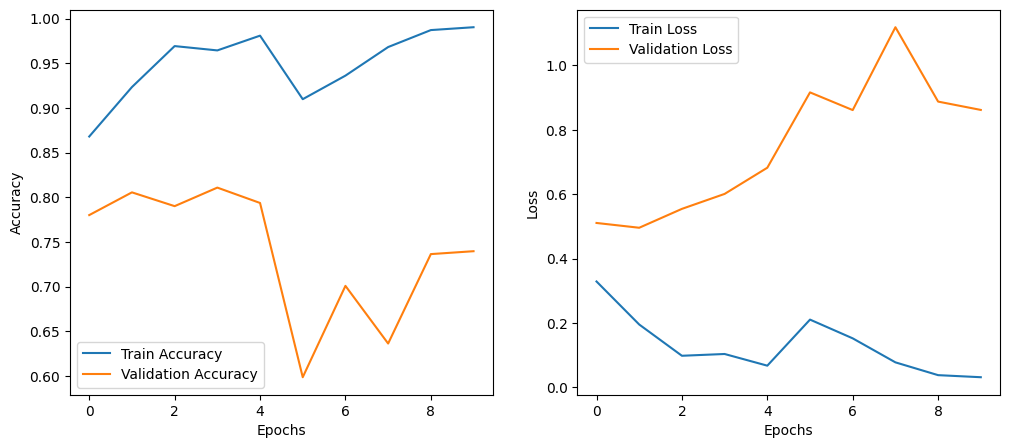

In [19]:
# Visualize Training Results

# Plot loss and accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
